## ERA5 variable comparison

- download daily mean of ERA5 variables
- look at different ERA5 variables and decied which one is best

In [19]:
# import packages

import cdsapi
import xarray as xr

In [16]:
# download the data

c = cdsapi.Client()

#MONTHS = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"] 
MONTHS = ["01"]

for month in MONTHS: 
 
    result = c.service(
        "tool.toolbox.orchestrator.workflow",
         params={ 
            "realm": "user-apps",
            "project": "app-c3s-daily-era5-statistics",
            "version": "master",
            "kwargs": {
                     "dataset": "reanalysis-era5-single-levels",
                     "product_type": "reanalysis",
                     "variable": "eastward_turbulent_surface_stress",
                     "statistic": "daily_mean",
                     "year": "2020",
                     "month": month,
                     "time_zone": "UTC+00:00",
                     "frequency": "1-hourly",
                     "grid": "0.25/0.25",
                     "area": {"lat": [-20, -5], "lon": [35, 45]} 
              },
              "workflow_name": "application"
    })
    c.download(result,["test.nc"])

2024-04-10 16:52:51,640 INFO Welcome to the CDS
2024-04-10 16:52:51,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/tasks/services/tool/toolbox/orchestrator/workflow/clientid-5b3b1fd872394780912bff009ac9f75c
2024-04-10 16:52:51,767 INFO Request is queued
2024-04-10 16:52:52,815 INFO Request is running
2024-04-10 16:53:41,558 INFO Request is completed
2024-04-10 16:53:41,560 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/557c667e-48a2-4698-8819-696383c9eaf4.nc to test.nc (319.3K)
2024-04-10 16:53:42,174 INFO Download rate 521.4K/s                             


In [20]:
## try to plot 

test = xr.open_dataset("test.nc")

In [21]:
test

<xarray.Dataset> Size: 311kB
Dimensions:      (time: 31, lat: 61, lon: 41)
Coordinates:
  * time         (time) datetime64[ns] 248B 2020-01-01 2020-01-02 ... 2020-01-31
    realization  int64 8B ...
  * lat          (lat) float64 488B -20.0 -19.75 -19.5 ... -5.5 -5.25 -5.0
  * lon          (lon) float64 328B 35.0 35.25 35.5 35.75 ... 44.5 44.75 45.0
Data variables:
    ewss         (time, lat, lon) float32 310kB ...
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2024-04-10T15:45 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

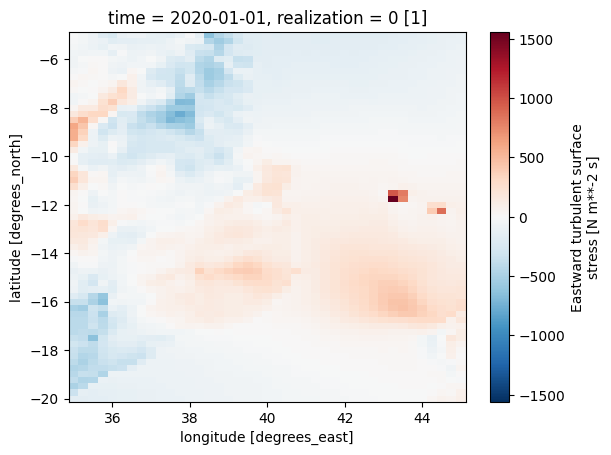

In [22]:
test.ewss.isel(time = 0).plot()